In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


In [14]:
df=pd.read_excel("C:\\Users\\HP\\Downloads\\loan.xlsx")

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

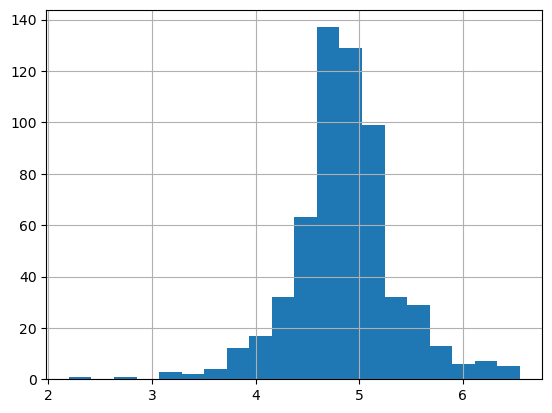

In [18]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

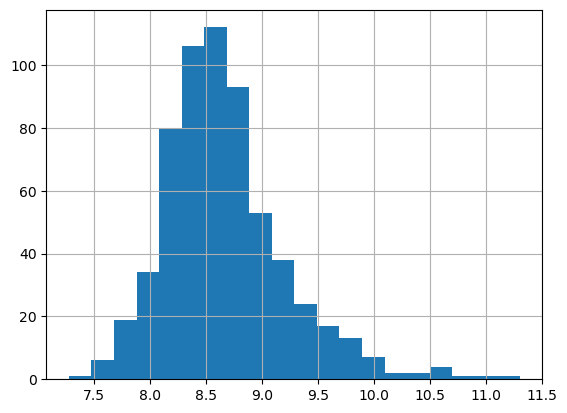

In [20]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)


df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [21]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([['Male', 'No', 0, ..., 1.0, nan, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [14]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [22]:
print("percentage of missing gender is %2f%%"%((df['Gender'].isnull().sum()/df.shape[0])*100))

percentage of missing gender is 2.117264%


Number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

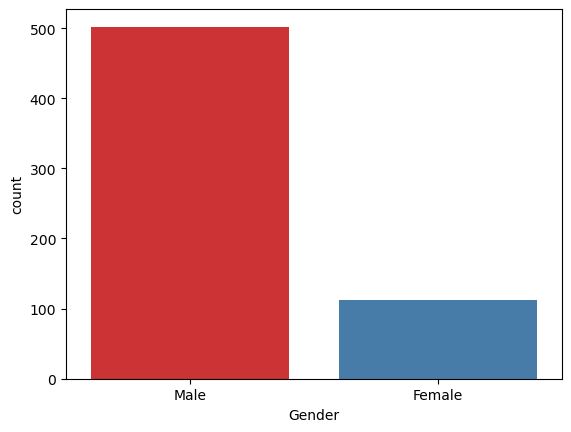

In [16]:
print("Number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Number of people who take loan as group by Marital Status:
Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

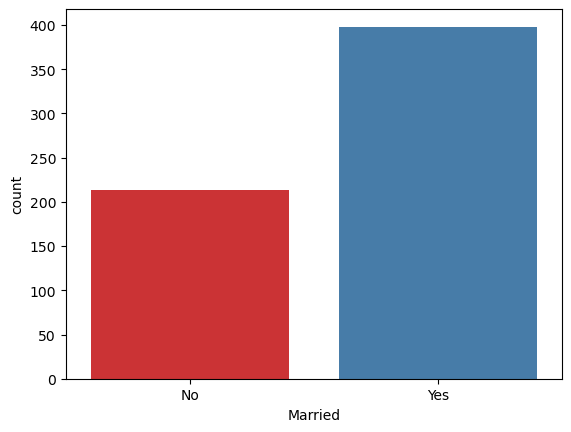

In [23]:
print("Number of people who take loan as group by Marital Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

Number of people who take loan as group by dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

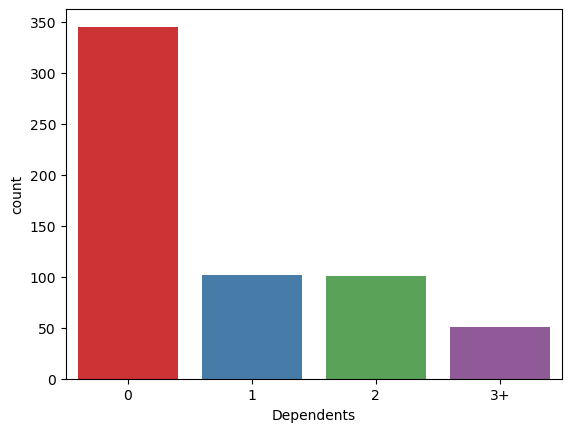

In [24]:
print("Number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

Number of people who take loan as group by Self Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

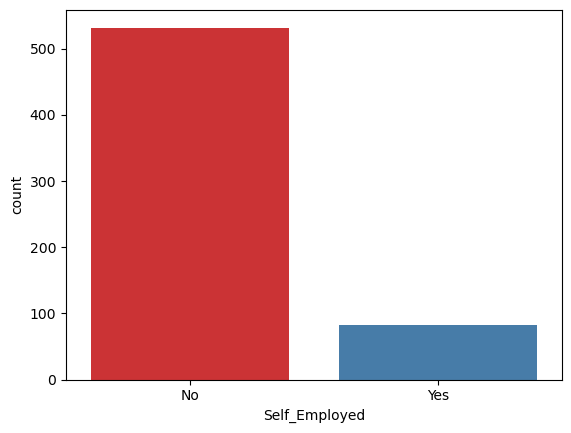

In [20]:
print("Number of people who take loan as group by Self Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

Number of people who take loan as group by Loanamount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

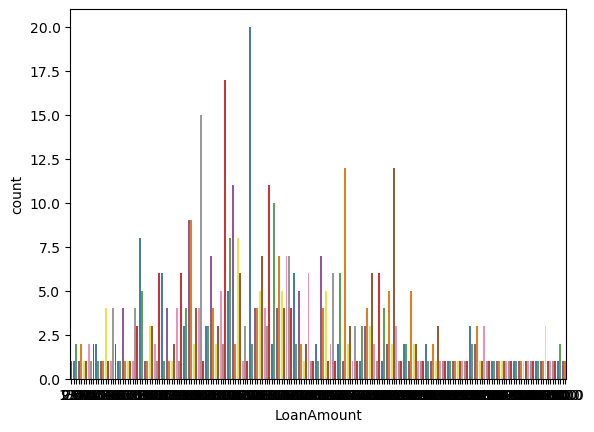

In [25]:
print("Number of people who take loan as group by Loanamount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

Number of people who take loan as group by Credit History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

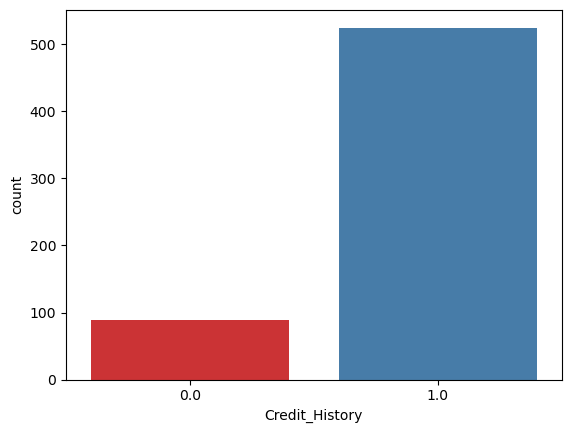

In [22]:
print("Number of people who take loan as group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [26]:




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()


In [29]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming you have defined X_train and X_test earlier

# Define the columns that contain categorical data
categorical_columns = [0, 1, 2, 3, 4]  # Modify based on your actual data

# Create a new LabelEncoder instance for each categorical column
label_encoders = [LabelEncoder() for _ in categorical_columns]

# Apply LabelEncoder to each categorical column in X_train
for i, col_idx in enumerate(categorical_columns):
    col_values = X_train[:, col_idx]
    
    # Convert all values to strings and fill NaNs with a placeholder
    col_values = np.array([str(value) if not pd.isna(value) else 'NaN' for value in col_values])
    
    # Fit and transform using the LabelEncoder
    X_train[:, col_idx] = label_encoders[i].fit_transform(col_values)

# Now, do the same for the 7th column
col_values_7 = X_train[:, 7]
col_values_7 = np.array([str(value) if not pd.isna(value) else 'NaN' for value in col_values_7])
X_train[:, 7] = label_encoders[0].fit_transform(col_values_7)  # Reusing the first label encoder

# Print X_train to check
print(X_train)


[[1 1 0 ... 1.0 4.875197323201151 187]
 [1 0 1 ... nan 5.278114659230517 343]
 [1 1 0 ... 0.0 5.003946305945459 167]
 ...
 [1 1 3 ... 1.0 5.298317366548036 294]
 [1 1 0 ... 1.0 5.075173815233827 194]
 [0 1 0 ... 1.0 5.204006687076795 226]]


In [30]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Load your data and perform data preprocessing

# Assuming you have defined X_train, X_test, and label_encoders

# Define the columns that contain categorical data
categorical_columns = [0, 1, 2, 3, 4]  # Modify based on your actual data

# Apply the transformations to both X_train and X_test
for col_idx in categorical_columns:
    # Fit the label encoder on the combined data of X_train and X_test
    combined_values = np.concatenate((X_train[:, col_idx], X_test[:, col_idx]), axis=0)
    label_encoders[col_idx].fit(combined_values)

    # Transform the data in both X_train and X_test using the trained encoder
    X_train[:, col_idx] = label_encoders[col_idx].transform(X_train[:, col_idx])
    X_test[:, col_idx] = label_encoders[col_idx].transform(X_test[:, col_idx])

# Print X_test to check
print(X_test)


[[1 0 0 0 15 1.0 4.430816798843313 85]
 [0 0 0 0 15 1.0 4.718498871295094 28]
 [1 1 0 0 15 1.0 5.780743515792329 104]
 [1 1 0 0 15 1.0 4.700480365792417 80]
 [1 1 2 0 15 1.0 4.574710978503383 22]
 [1 1 0 1 13 0.0 5.10594547390058 70]
 [1 1 3 0 13 1.0 5.056245805348308 77]
 [1 0 0 0 15 1.0 6.003887067106539 114]
 [1 0 0 0 17 0.0 4.820281565605037 53]
 [1 1 0 0 15 1.0 4.852030263919617 55]
 [0 0 0 0 15 1.0 4.430816798843313 4]
 [1 1 1 0 15 1.0 4.553876891600541 2]
 [0 0 0 0 15 1.0 5.634789603169249 96]
 [1 1 2 0 15 1.0 5.4638318050256105 97]
 [1 1 0 0 15 1.0 4.564348191467836 117]
 [1 1 1 0 15 1.0 4.204692619390966 22]
 [1 0 1 1 15 nan 5.247024072160486 32]
 [1 0 0 1 15 1.0 4.882801922586371 25]
 [0 0 0 0 15 nan 4.532599493153256 1]
 [1 1 0 1 15 0.0 5.198497031265826 44]
 [0 1 0 0 15 0.0 4.787491742782046 71]
 [1 1 0 0 15 1.0 4.962844630259907 43]
 [1 1 2 0 15 1.0 4.68213122712422 91]
 [1 1 2 0 15 1.0 5.10594547390058 111]
 [1 1 0 0 15 nan 4.060443010546419 35]
 [1 1 1 0 15 1.0 5.5214609

In [38]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [40]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create an imputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_imputed, y_train)


RandomForestClassifier()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Create an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed

# Define categorical and numerical columns
categorical_columns = [0, 1, 2, 3, 4]  # Replace with your categorical columns
numerical_columns = [5, 6, 7]  # Replace with your numerical columns

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ]
)

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy of random forest classifier:", accuracy)


Accuracy of random forest classifier: 0.7317073170731707


In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies too

# Create a pipeline
nb_pipeline = Pipeline([
    ('imputer', imputer),  # Impute missing values
    ('naive_bayes', GaussianNB())  # Gaussian Naive Bayes classifier
])

# Fit the pipeline to your data
nb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = nb_pipeline.predict(X_test)

# Calculate and print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3170731707317073


In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Fit the classifier on the imputed training data
dt_clf.fit(X_train_imputed, y_train)

# Transform test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions
y_pred = dt_clf.predict(X_test_imputed)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of DecisionTreeClassifier:", accuracy)


Accuracy of DecisionTreeClassifier: 0.7560975609756098


In [55]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of the KNeighborsClassifier
kn_clf = KNeighborsClassifier()

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Fit the classifier on the imputed training data
kn_clf.fit(X_train_imputed, y_train)

# Transform test data using the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions
y_pred = kn_clf.predict(X_test_imputed)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNeighborsClassifier:", accuracy)


Accuracy of KNeighborsClassifier: 0.7317073170731707
